 # R Crawler R爬蟲

> Chih-Cheng

In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'serif',
              'transition': 'default',
              'start_slideshow_at': 'selected',
})

{u'start_slideshow_at': 'selected',
 u'theme': 'serif',
 u'transition': 'default'}

# 資料從哪來？

- 資料庫來？
- 工讀生key來？
- 機器產生？如你的手機？
- 網站？

# 網站可以拿到什麼？
http://www.asap.com.tw/
![](asap.png)


## 什麼是爬蟲

> 利用程式有系統地造訪網頁，取得網頁內容。  
> 取出有用的資料以利後續應用。



<div class="row">
    <div class="col-md-3">
        
        <img src="spying.jpg">
        <h3>觀察網頁 </h3>
    </div>
    <div class="col-md-3">
    
        <img src="library.jpg">
        <h3>造訪網頁取得內容 </h3>
    </div>
    <div class="col-md-3">
        <img src="parsing.jpg">
        <h3>剖析資料 </h3>
    </div>
    <div class="col-md-3">
        <img src="storing.jpg">
        <h3>儲存資料 </h3>
    </div>
</div>


## 爬蟲流程 <span style="font-size:14px">pictures from https://pixabay.com</span>

# 實作方式

## 觀察網頁
[Dboy的R基礎教學](https://github.com/dboyliao/DSC2015_RBasic)
<img src="spying.jpg" style="height:300px;">

![github.png](github.png)

## 檢查網頁元素



![github_inspect.png](github_inspect.png)

## 造訪網頁取得內容

<img src="library.jpg" style="height:300px">


使用「[httr](https://cran.r-project.org/web/packages/httr/httr.pdf)」套件

In [4]:
library(httr)
url = "https://github.com/dboyliao/DSC2015_RBasic"
response = GET(url)
content = content(response)
print(capture.output(content)[1:10]) # Capture first 10 lines of output

 [1] "<!DOCTYPE html>"                                                                                                                                                        
 [2] "<html lang=\"en\" class=\"\">"                                                                                                                                          
 [3] "<head prefix=\"og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# object: http://ogp.me/ns/object# article: http://ogp.me/ns/article# profile: http://ogp.me/ns/profile#\">"
 [4] "<meta charset=\"utf-8\">"                                                                                                                                               
 [5] "<meta http-equiv=\"X-UA-Compatible\" content=\"IE=edge\">"                                                                                                              
 [6] "<meta http-equiv=\"Content-Language\" content=\"en\">"                                                                 

會有些許不同，但大多是一樣的
![](html_head.png)

## 剖析資料

<img src="parsing.jpg" style="height:300px">

針對不同資料格式要選不一樣的剖析套件。以html檔案為例，使用CSS選擇器來剖析。

In [6]:
library(XML)
library(selectr)
nodes = querySelectorAll(content,".files .content a")
nodes

[[1]]
<a href="/dboyliao/DSC2015_RBasic/tree/master/DSC2015" class="js-directory-link" id="85110664b2e3419869c3e238b643b754-aa21898809ee549f307bd1ebbda664142f0643ed" title="DSC2015">DSC2015</a> 

[[2]]
<a href="/dboyliao/DSC2015_RBasic/tree/master/slides" class="js-directory-link" id="f4d5c52946e476c66dfc36433c82aa78-fadb2e9686a43b3c997d430609eac0780c28798e" title="slides">slides</a> 

[[3]]
<a href="/dboyliao/DSC2015_RBasic/blob/master/.gitignore" class="js-directory-link" id="a084b794bc0759e7a6b77810e01874f2-2065e6d4cc27613d71d470bbc7bd7e3f5ee537a0" title=".gitignore">.gitignore</a> 

[[4]]
<a href="/dboyliao/DSC2015_RBasic/blob/master/DSC2015.zip" class="js-directory-link" id="26f66044f934a914bce37bd512eb33b4-c23bd23f1492a77d33284485aac7e85b8b2e9851" title="DSC2015.zip">DSC2015.zip</a> 

[[5]]
<a href="/dboyliao/DSC2015_RBasic/blob/master/RBasic1.R" class="js-directory-link" id="b232b3fb3a8cbf459c8344ec15365d24-c3c27450020f45945a0da10c98292f416ddfb3f9" title="RBasic1.R">RBasic1.R</a

## 取出字串

In [10]:
xmlValue(nodes[[1]])

[1] "DSC2015"

# 範例欣賞

## 新北市消防局API [http://hackersome.com/p/faryne/ntpcfd-stats](http://hackersome.com/p/faryne/ntpcfd-stats)

- API Endpoint：http://ha2.tw/ntpcfd/api/json
    - Request Type：GET
    - Response Type：JSON


- 所需參數：

| 參數 | 意義 | 格式、範例 |
|-|-|-|
| service_time    | 出勤日期  | 格式為 YYYY-mm-dd |
| service_unit[]  | 出勤分隊  | 例如 樹林分隊 、 板橋分隊 |
| service_type[]  | 出勤任務類型  | 目前只能輸入 救護、火災 、 災害 |

- 回傳結果：
    - service_type：出勤任務類型
    - service_unit：出勤分隊
    - service_addr：出勤地址
    - service_time：報案時間
    - lat：出勤地址約略緯度
    - lng：出勤地址約略經度
- 備註：若不帶入任何參數，則取出當天所有報案紀錄。
- 資料來源：http://epaper.tpf.gov.tw/liveview/default.asp


## 觀察網頁
<img src="spying.jpg" style="height:300px;">

![](api_page.png)

![](json_parse.png)

## 造訪網頁取得內容 + 剖析資料
    
<div class="row">
    <div class="col-md-3">
    
        <img src="library.jpg">
        <h3>造訪網頁取得內容 </h3>
    </div>
    <div class="col-md-3">
        <img src="parsing.jpg">
        <h3>剖析資料 </h3>
    </div>
</div>

In [8]:
library(jsonlite)

url = "http://ha2.tw/ntpcfd/api/json?service_time=2015-07-25"
data = jsonlite::fromJSON(url)
head(data)

,service_type,service_unit,service_addr,service_time,lat,lng
1,災害,蘆洲分隊,新北市蘆洲區三民路,2015-07-25 00:00:00,25.089419500,121.468358900
2,災害,中和分隊,新北市中和區中和路,2015-07-25 00:13:00,24.999690800,121.505932400
3,災害,蘆洲分隊,新北市蘆洲區永平街 永樂街38巷交叉路,2015-07-25 00:13:00,25.091188200,121.458256100
4,災害,裕民分隊,新北市新莊區民安西路88巷1弄,2015-07-25 00:14:00,25.019213600,121.426440000
5,災害,德音分隊,新北市泰山區泰林路二段,2015-07-25 00:16:00,25.060163500,121.434021400
6,災害,新店分隊,新北市新店區中興路三段,2015-07-25 00:19:00,24.981748900,121.543918800


## 檢視資料

In [11]:
summary(data)

 service_type       service_unit       service_addr       service_time      
 Length:490         Length:490         Length:490         Length:490        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
     lat                lng           
 Length:490         Length:490        
 Class :character   Class :character  
 Mode  :character   Mode  :character  

## 預處理

In [62]:
library(knitr)
data$service_type = as.factor(data$service_type)
data$service_unit = as.factor(data$service_unit)
data$lat = as.numeric(data$lat)
data$lng = as.numeric(data$lng)
dataWithGeoPoint = data[ data$lng>0, ]
IRdisplay::display_html(summary(dataWithGeoPoint))

ERROR: Error: No method asJSON S3 class: table


## 簡單視覺化

Warning message:
: bounding box given to google - spatial extent only approximate.converting bounding box to center/zoom specification. (experimental)
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=25.084719,121.661214&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false


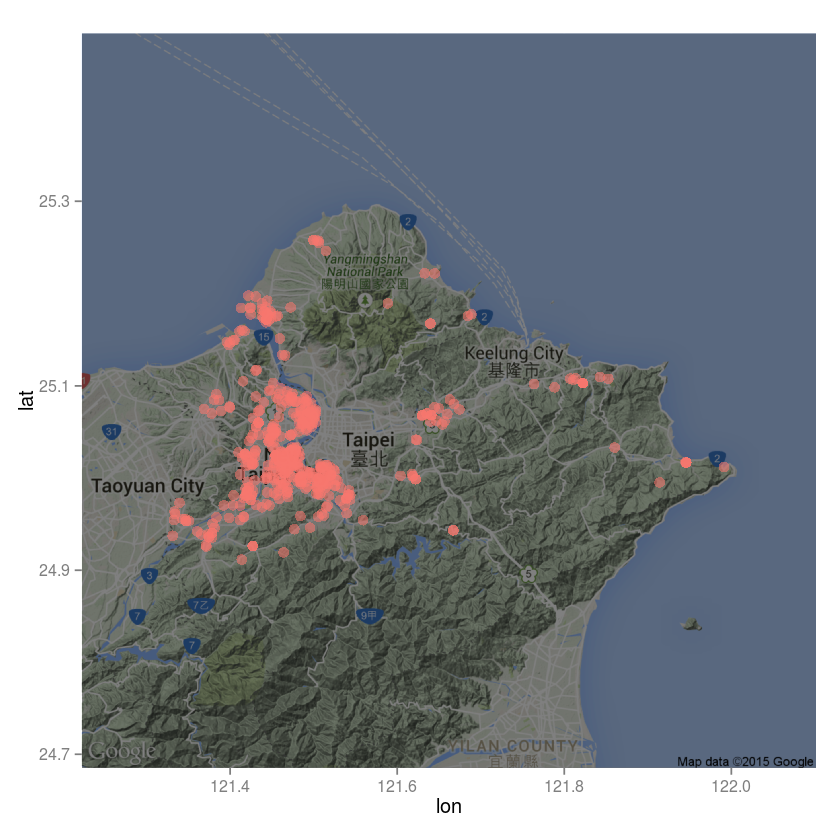

In [28]:
library(ggplot2)
library(ggmap)

box = make_bbox(dataWithGeoPoint$lng, dataWithGeoPoint$lat) 
p = ggmap(get_map(box), darken = c(0.5, "black")) 
q = p + geom_point(data=dataWithGeoPoint, aes(lng, lat, colour="red", alpha = 1/10 ), size =3)+ theme(legend.position="none")
q

## 從這個資料可以得到什麼洞見呢？

<div style="height:400px;width:500px;background-color:black;"></div>

# 八卦是﹍
這個API在8/8颱風之後，就沒有新資料了

![](no_data.png)